In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    datasets, metrics, model_selection as skms, neighbors
)

In [2]:
dataset = datasets.load_iris()

In [3]:
knc = neighbors.KNeighborsClassifier()

In [15]:
neighbors = [1, 3, 5, 10, 15, 20]
(train_scores, test_scores) = skms.validation_curve(knc, dataset.data, dataset.target, param_name="n_neighbors", param_range=neighbors, cv=5)
train_scores, test_scores

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.95833333, 0.95833333, 0.96666667, 0.96666667, 0.95      ],
        [0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667],
        [0.975     , 0.975     , 0.975     , 0.98333333, 0.95833333],
        [0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667],
        [0.98333333, 0.95833333, 0.975     , 0.975     , 0.94166667]]),
 array([[0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ],
        [0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ],
        [0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ],
        [0.96666667, 1.        , 1.        , 0.93333333, 1.        ],
        [0.93333333, 1.        , 0.93333333, 0.96666667, 1.        ],
        [0.93333333, 1.        , 0.93333333, 0.93333333, 1.        ]]))

In [54]:
df = pd.DataFrame(test_scores, index=(neighbors))
df["Mean"] = np.mean(test_scores, axis=1)
df.index.name = "no. of neighbors used"
df

,0,1,2,3,4,Mean
no. of neighbors used,,,,,,
1,0.966667,0.966667,0.933333,0.933333,1.0,0.960000
3,0.966667,0.966667,0.933333,0.966667,1.0,0.966667
5,0.966667,1.000000,0.933333,0.966667,1.0,0.973333
10,0.966667,1.000000,1.000000,0.933333,1.0,0.980000
15,0.933333,1.000000,0.933333,0.966667,1.0,0.966667
20,0.933333,1.000000,0.933333,0.933333,1.0,0.960000


In [50]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

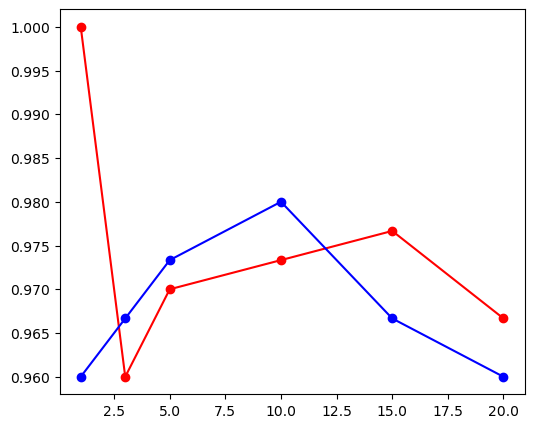

In [56]:
plt.figure(figsize=(6, 5)).gca()
plt.plot(neighbors, train_mean, "o-", color="r", label="Train")
plt.plot(neighbors, test_mean, "o-", color="b", label="Test")
plt.fill_between(int(neighbors), train_mean + train_std, train_mean - train_std, color="r", alpha=0.1)
plt.fill_between(int(neighbors), test_mean + test_std, test_mean - test_std, color="b", alpha=0.1)
plt.legend(loc="best")
plt.xlabel("\n".join(["k for k-nn", "lower k, more complex", ""]))